## Goal: Simulate, visualize and test output data 

In [1]:
import scipy
from scipy import stats
from scipy import special
from scipy.stats import beta
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import palettable as pal
from matplotlib.colors import LogNorm

%matplotlib inline

In [2]:
df=pd.read_csv('simulated_counts.csv',index_col=0).T
cmap=pal.colorbrewer.diverging.PiYG_10_r.get_mpl_colormap()

df_small=df[0:1000]
test=df.describe()

In [3]:
# fig,ax=plt.subplots(1)
# df.plot(kind='box', figsize=(10,4),ax=ax)
# ax.set_yscale('log')
df_small.sort(99)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
736,0,0,0,0,1,3,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
198,0,0,2,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,3,0
205,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,10,2,1,1,2,1,2,0,5,2,...,5,3,1,3,1,1,1,1,1,0
215,0,2,0,0,2,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
216,2,2,0,2,1,4,2,1,1,6,...,1,5,3,3,0,9,4,1,1,0
568,0,0,3,0,0,0,1,0,0,3,...,0,0,2,0,0,0,0,0,1,0
561,7,4,0,4,3,2,8,7,6,2,...,22,20,17,2,6,2,4,2,5,0
915,3,8,3,3,10,4,4,1,1,2,...,5,1,5,4,0,5,3,1,2,0


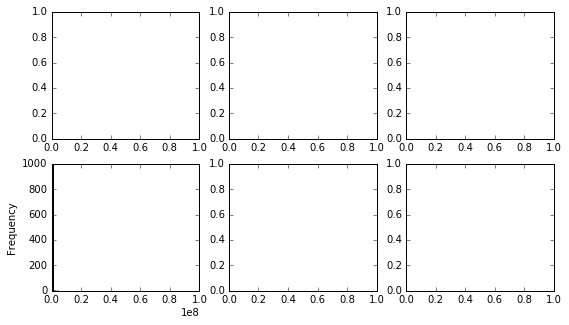

In [14]:
fig,axs = plt.subplots(2,3)
fig.set_size_inches(9,5)
def visualize_data(df, axs, cmap):
    #calculate and sort by the mean
#     df.plot(kind='hist', ax = axs[0][0], color='k', alpha=0.25, legend=False)
    df_details=df.T.describe()
    df.plot(kind='hist', ax = axs[1][0], color='k', alpha=0.25, legend=False, range = [0,1e8], bins=100)
#     df_details.loc['mean'].plot(kind='hist')
#     df2['mean']=df2.mean(axis=1)
#     df2=df2.sort('mean', ascending=False)
#     df2.T.drop('mean')
#     ax.pcolor(df2, cmap=cmap)
    

visualize_data(df_small,axs,cmap)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


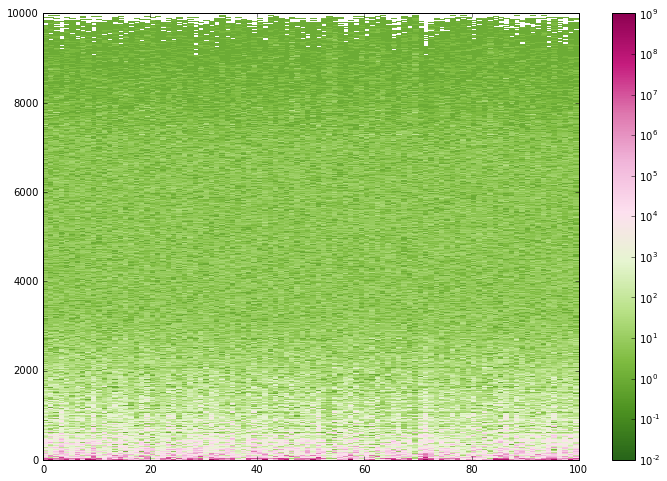

In [9]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)
def visualize_heatmap(df, axs, cmap, fig):
    df2=df.copy()
    df2['mean']=df2.mean(axis=1)
    df2=df2.sort('mean', ascending=False)
    df2=df2.T.drop('mean').T
    h=ax.pcolor(df2, cmap=cmap, norm=LogNorm(vmin=.01, vmax=1e9))
    ax.margins(0,0)
    fig.colorbar(h)
    
visualize_heatmap(df, ax, cmap, fig)


In [20]:
real=pd.read_table('Cosci_Gene_ExpectedCounts.tab',index_col=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


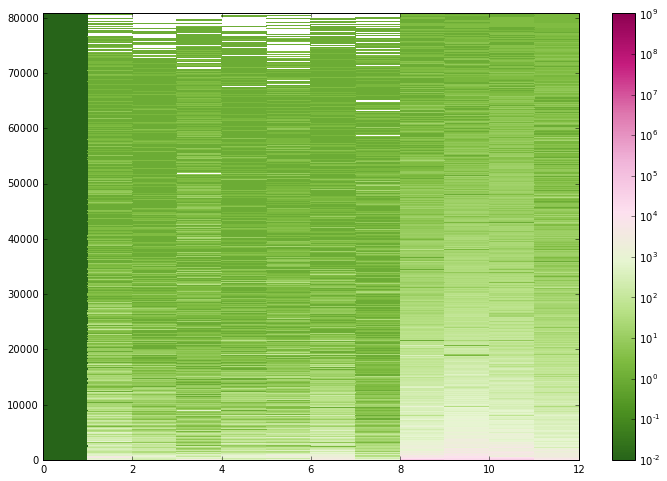

In [21]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12,8)

visualize_heatmap(real, ax, cmap, fig)
